# Modelo 3
-----
## Modelo clasificador de Gradient Boosting
Este modelo es muy robusto contra datasets imbalanceados.

La entrada de este modelo será el dataset 'prepared' con los datos ya preparados para su consumición.

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv("../prep/prepared.csv")
df = df.drop(columns=['Unnamed: 0']).dropna()
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0,-9839.64,0.00,-0.057496,0.000010
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0,-1864.28,0.00,-0.083791,0.000010
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,-181.00,0.00,-0.153251,0.000010
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0,-181.00,-21182.00,-0.153251,-0.954918
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0,-11668.14,0.00,-0.274196,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0,-339682.13,339682.13,-0.997065,339.682140
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1,-6311409.28,0.00,-0.999842,0.000010
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0,-6311409.28,6311409.27,-0.999842,90.826229
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1,-850002.52,0.00,-0.998825,0.000010


In [5]:
train, test = train_test_split(df)
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4771965, 16)
Number transactions y_train dataset:  (4771965,)
Number transactions X_test dataset:  (1590655, 16)
Number transactions y_test dataset:  (1590655,)


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6179
Before OverSampling, counts of label '0': 4765786 

After OverSampling, the shape of train_X: (9531572, 16)
After OverSampling, the shape of train_y: (9531572,) 

After OverSampling, counts of label '1': 4765786
After OverSampling, counts of label '0': 4765786


## Definición del modelo

In [23]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',    PCA(n_components=6, random_state=10)),
    ('gbc',    GradientBoostingClassifier(n_estimators=10,subsample=.8, random_state=10))
])

In [43]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=6, random_state=10)),
                ('gbc',
                 GradientBoostingClassifier(n_estimators=10, random_state=10,
                                            subsample=0.8))])

In [44]:
train_df = X_train
train_df['true'] = y_train

#train_df = train_df.sample(500000)

## Classification Metrics

In [46]:
cm = confusion_matrix(y_test,model.predict(X_test))

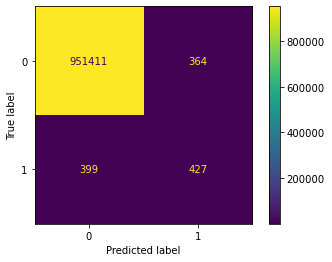

In [47]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
print(classification_report(train_df['true'],train_df['pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2855366
           1       0.89      0.48      0.62      2436

    accuracy                           1.00   2857802
   macro avg       0.94      0.74      0.81   2857802
weighted avg       1.00      1.00      1.00   2857802



In [ ]:
sensitivity = cm[1][1]/(cm[1][1]+cm[0][1])
print(sensitivity)

0.8867781155015197


### Prestaciones del modelo:
Precisión:   95%

Recall:      69%

F1 score:    77%

Sensitivity: 89%

In [57]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\juani\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


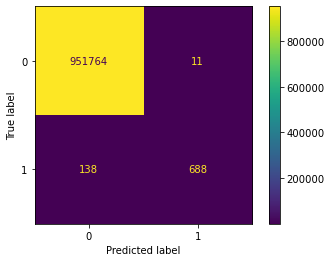

In [58]:
cm2 = confusion_matrix(y_test,xgb_yhat)
disp = ConfusionMatrixDisplay(cm2)
disp.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(X_train_res, y_train_res)

In [ ]:
from joblib import dump

In [ ]:
dump(rf_resampled, 'rf_final.joblib')

Confusion Matrix - Random Forest
[[951686     89]
 [    12    814]]


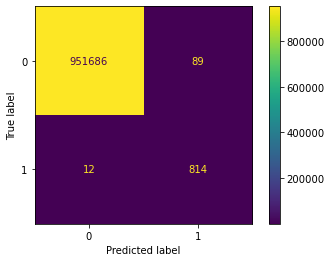

In [64]:
predictions_resampled = rf_resampled.predict(X_test)
random_forest_score_resampled = rf_resampled.score(X_test,y_test) * 100
cm_resampled = confusion_matrix(y_test, predictions_resampled .round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
disp = ConfusionMatrixDisplay(cm_resampled)
disp.plot()

In [65]:
from joblib import dump, load

In [67]:
dump(rf_resampled, 'modelos/random_forest_sm_final.joblib') 

['modelos/random_forest_sm_final.joblib']